# Import

In [1]:
import numpy as np
from scipy.interpolate import griddata
from scipy import interpolate, signal
import pickle as pickle
from matplotlib import pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

# Observed Grid and Data

In [2]:
# Total field anomaly of aero survey at z=900m in Carajas, Para, Brasil
yi_f1,xi_f1,zi_f1,dobs_f1 = np.genfromtxt('1123_MagLine.XYZ', skip_header=11, usecols = (0, 1, 7, 15),
                                              invalid_raise=False, unpack=True)

# Total field anomaly of aero survey Tie lines at z=900m in Carajas, Para, Brasil
#yi_f2,xi_f2,zi_f2,dobs_f2 = np.genfromtxt('1123_MagTie.XYZ', skip_header=11, usecols = (0, 1, 7, 15),
#                                             invalid_raise=False, unpack=True)

<ipython-input-2-6fe9a88b29ac>:2: ConversionWarning: Some errors were detected !
    Line #50976 (got 2 columns instead of 4)
    Line #94854 (got 2 columns instead of 4)
    Line #94855 (got 2 columns instead of 4)
    Line #94856 (got 2 columns instead of 4)
    Line #142658 (got 2 columns instead of 4)
    Line #187208 (got 2 columns instead of 4)
    Line #187209 (got 2 columns instead of 4)
    Line #187210 (got 2 columns instead of 4)
    Line #230926 (got 2 columns instead of 4)
    Line #278981 (got 2 columns instead of 4)
    Line #278982 (got 2 columns instead of 4)
    Line #278983 (got 2 columns instead of 4)
    Line #323104 (got 2 columns instead of 4)
    Line #371515 (got 2 columns instead of 4)
    Line #371516 (got 2 columns instead of 4)
    Line #371517 (got 2 columns instead of 4)
    Line #415055 (got 2 columns instead of 4)
    Line #462088 (got 2 columns instead of 4)
    Line #462089 (got 2 columns instead of 4)
    Line #462090 (got 2 columns instead of 4)
   

In [3]:
#xi_c = np.hstack((xi_f1,xi_f2))
#yi_c = np.hstack((yi_f1,yi_f2))
#zi_c = np.hstack((zi_f1,zi_f2))
#dobs_c = np.hstack((dobs_f1,dobs_f2))

## Plot the non-gridded data of Carajas, Brasil

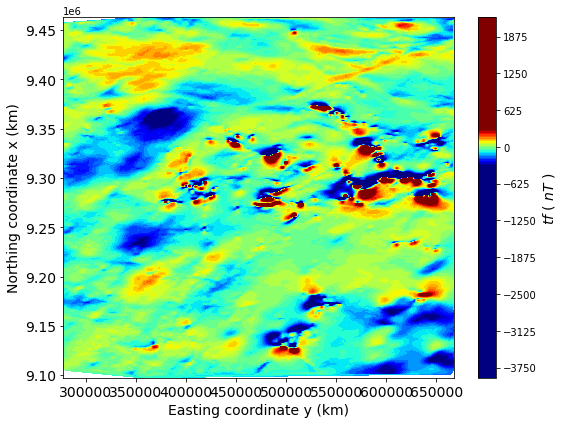

In [5]:
fig = plt.figure(figsize=(8,6))
fig.patch.set_facecolor('xkcd:white')
plt.tricontourf(yi_f1, xi_f1, dobs_f1, 300, vmin=-300, vmax=300, cmap='jet')
#cb = plt.colorbar(shrink=0.825)
cb = plt.colorbar()
#plt.axis('scaled')
cb.set_label('$tf$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_f1),np.max(yi_f1))
plt.ylim(np.min(xi_f1),np.max(xi_f1))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (km)', fontsize=14)
plt.tight_layout();
#plt.savefig('figures/carajas_real_data_500x500.png', dpi=300)

### Delimiter the area of study

In [3]:
x_min = 9110000
x_max = 9457500
mask1 = np.ma.masked_where(xi_f1 <= x_min, xi_f1)
xi_mask1 = xi_f1[~mask1.mask].copy()
yi_mask1 = yi_f1[~mask1.mask].copy()
zi_mask1 = zi_f1[~mask1.mask].copy()
dobs_mask1 = dobs_f1[~mask1.mask].copy()

In [4]:
mask2 = np.ma.masked_where(xi_mask1 >= x_max, xi_mask1)
xi_mask2 = xi_mask1[~mask2.mask].copy()
yi_mask2 = yi_mask1[~mask2.mask].copy()
zi_mask2 = zi_mask1[~mask2.mask].copy()
dobs_mask2 = dobs_mask1[~mask2.mask].copy()

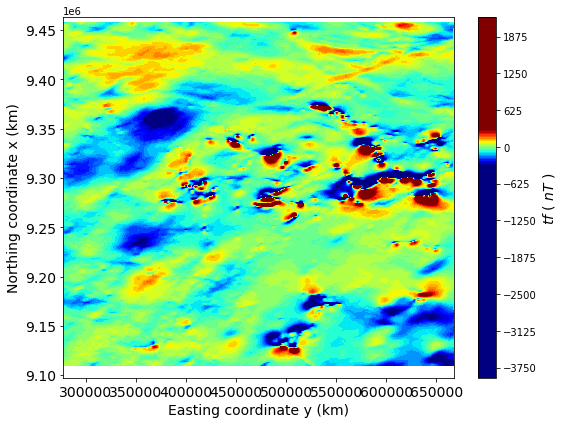

In [44]:
fig = plt.figure(figsize=(8,6))
fig.patch.set_facecolor('xkcd:white')
plt.tricontourf(yi_mask2, xi_mask2, dobs_mask2, 300, vmin=-300, vmax=300, cmap='jet')
#cb = plt.colorbar(shrink=0.825)
cb = plt.colorbar()
#plt.axis('scaled')
cb.set_label('$tf$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_f1),np.max(yi_f1))
plt.ylim(np.min(xi_f1),np.max(xi_f1))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (km)', fontsize=14)
plt.tight_layout();
#plt.savefig('figures/carajas_real_data_500x500.png', dpi=300)

In [22]:
count = 1
list_grid = []
list_index = [-1]
for i in range (len(xi_mask2)-1):
    if yi_mask2[i]+1000 > yi_mask2[i+1]:
        count += 1
    else:
        list_index.append(i)
        list_grid.append(count)
        count = 1
list_grid.append(len(xi_mask2)-sum(list_grid))
list_index.append(len(xi_mask2))

In [23]:
len(list_grid)

131

In [24]:
print(list_grid)

[50441, 43207, 47022, 43894, 43044, 47337, 43585, 47670, 43256, 46335, 42981, 47150, 44696, 46480, 45542, 45666, 43402, 45287, 46291, 46581, 43710, 44232, 44910, 47354, 44585, 45554, 43143, 46968, 43973, 45611, 44403, 47017, 43084, 43994, 43415, 46319, 42814, 45301, 41587, 45495, 41394, 44777, 43885, 46769, 41833, 45944, 43136, 47738, 42942, 45856, 43706, 46172, 44625, 48247, 44974, 44411, 45609, 46071, 46171, 45989, 45509, 45571, 46072, 45392, 46052, 45372, 45803, 45830, 45705, 45933, 45730, 45907, 45642, 45708, 45574, 45450, 44920, 45211, 44891, 45559, 45173, 45503, 44732, 45377, 45632, 45076, 45656, 45685, 45979, 45528, 45760, 45457, 45264, 45580, 45027, 46078, 45900, 45885, 46024, 45910, 45145, 45113, 45298, 44859, 45825, 45331, 45719, 45361, 45595, 45695, 45562, 45781, 45587, 45473, 45797, 45499, 45780, 46320, 46460, 45709, 46236, 45456, 46113, 45823, 46122, 45710, 45955, 46197, 46196, 46380, 46178]


In [25]:
print(list_index)

[-1, 50440, 93647, 140669, 184563, 227607, 274944, 318529, 366199, 409455, 455790, 498771, 545921, 590617, 637097, 682639, 728305, 771707, 816994, 863285, 909866, 953576, 997808, 1042718, 1090072, 1134657, 1180211, 1223354, 1270322, 1314295, 1359906, 1404309, 1451326, 1494410, 1538404, 1581819, 1628138, 1670952, 1716253, 1757840, 1803335, 1844729, 1889506, 1933391, 1980160, 2021993, 2067937, 2111073, 2158811, 2201753, 2247609, 2291315, 2337487, 2382112, 2430359, 2475333, 2519744, 2565353, 2611424, 2657595, 2703584, 2749093, 2794664, 2840736, 2886128, 2932180, 2977552, 3023355, 3069185, 3114890, 3160823, 3206553, 3252460, 3298102, 3343810, 3389384, 3434834, 3479754, 3524965, 3569856, 3615415, 3660588, 3706091, 3750823, 3796200, 3841832, 3886908, 3932564, 3978249, 4024228, 4069756, 4115516, 4160973, 4206237, 4251817, 4296844, 4342922, 4388822, 4434707, 4480731, 4526641, 4571786, 4616899, 4662197, 4707056, 4752881, 4798212, 4843931, 4889292, 4934887, 4980582, 5026144, 5071925, 5117512, 51

In [26]:
len(list_index)

132

## Ideal Grid 10000 x 131

In [13]:
# Create a regular grid
shape_m = (10000, 131)
grid_x = np.linspace(x_min,x_max,shape_m[0])
grid_y = np.linspace(np.min(yi_mask2),np.max(yi_mask2),shape_m[1])
grid_y, grid_x = np.meshgrid(grid_y, grid_x)
grid_z = np.zeros_like(grid_x)-900

In [20]:
ideal_distance = ((grid_x*grid_x) + (grid_y*grid_y) + (grid_z*grid_z))**(0.5)

## Decimation

In [21]:
true_distance = ((xi_mask2*xi_mask2) + (yi_mask2*yi_mask2) + (zi_mask2*zi_mask2))**(0.5)

In [36]:
xi = []
yi = []
zi = []
dobs = []

for i in range (shape_m[1]):
    xi_partial = xi_mask2[list_index[i]+1:list_index[i+1]]
    yi_partial = yi_mask2[list_index[i]+1:list_index[i+1]]
    zi_partial = zi_mask2[list_index[i]+1:list_index[i+1]]
    dobs_partial = dobs_mask2[list_index[i]+1:list_index[i+1]]
    for k in range (shape_m[0]):
        differ = np.abs(true_distance[list_index[i]+1:list_index[i+1]] - ideal_distance[k,i])
        index = differ.argmin()
        xi.append(xi_partial[index])
        yi.append(yi_partial[index])
        zi.append(zi_partial[index])
        dobs.append(dobs_partial[index])

In [53]:
xi_dec = np.array(xi)
yi_dec = np.array(yi)
zi_dec = np.array(-zi)
dobs_dec = np.array(dobs)

In [67]:
xi_matrix = xi_dec.reshape(131,10000)
xi_matrix_transpose = xi_matrix.T
xi_dec = np.ravel(xi_matrix_transpose)

yi_matrix = yi_dec.reshape(131,10000)
yi_matrix_transpose = yi_matrix.T
yi_dec = np.ravel(yi_matrix_transpose)

zi_matrix = zi_dec.reshape(131,10000)
zi_matrix_transpose = zi_matrix.T
zi_dec = np.ravel(zi_matrix_transpose)

dobs_matrix = dobs_dec.reshape(131,10000)
dobs_matrix_transpose = dobs_matrix.T
dobs_dec = np.ravel(dobs_matrix_transpose)

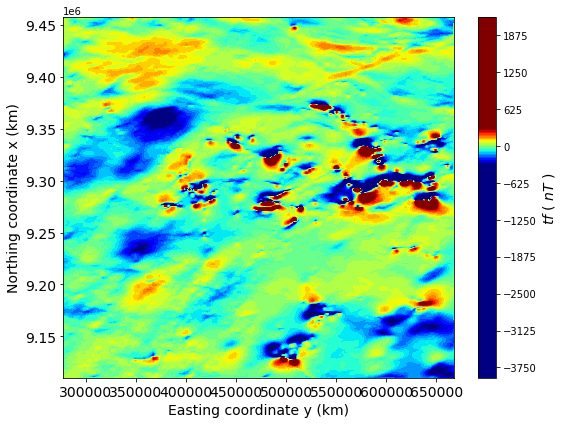

In [44]:
fig = plt.figure(figsize=(8,6))
fig.patch.set_facecolor('xkcd:white')
plt.tricontourf(yi_dec, xi_dec, dobs_dec, 300, vmin=-300, vmax=300, cmap='jet')
#cb = plt.colorbar(shrink=0.825)
cb = plt.colorbar()
#plt.axis('scaled')
cb.set_label('$tf$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_dec),np.max(yi_dec))
plt.ylim(np.min(xi_dec),np.max(xi_dec))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (km)', fontsize=14)
plt.tight_layout();
#plt.savefig('figures/carajas_real_data_500x500.png', dpi=300)

# Save the data

In [68]:
carajas = dict()
carajas['x'] = np.ravel(xi_dec)
carajas['y'] = np.ravel(yi_dec)
carajas['z'] = np.ravel(zi_dec)
carajas['tf'] = np.ravel(dobs_dec)

In [69]:
#save the data
file_name = 'carajas_decimated_tf.pickle'
with open(file_name, 'wb') as f:
    pickle.dump(carajas, f)

# Test pickle file

In [70]:
with open('carajas_decimated_tf.pickle', 'rb') as r:
    carajas_test = pickle.load(r)

In [71]:
carajas_test['x']

array([9110012.81, 9110004.93, 9110007.66, ..., 9457498.69, 9457490.07,
       9457495.32])

In [72]:
carajas_test['y']

array([277476.53, 280467.68, 283493.91, ..., 661502.06, 664496.73,
       667509.61])

In [73]:
carajas_test['z']

array([ -877.09,  -858.28,  -800.26, ..., -1002.37, -1020.96,  -961.53])